slide-1- regressao linear

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 200

n = np.random.randint(5,100)
b = 5 + np.random.random()
slope = np.random.random()
print(f"n = {n}, b = {b:.2f}, slope = {slope:.2f}")

w = np.array([b, slope]).reshape((2,1))
x = np.hstack((np.ones((n,1)), np.random.random((n,1))))
y_gt = w[0] + w[1] * x[:,1].reshape(x.shape[0],1)

noise = 0.09*np.random.randn(x.shape[0], 1)
y = w[0] + w[1] * x[:,1].reshape(x.shape[0],1) + noise

w_best = np.matmul(np.matmul(np.linalg.inv(np.dot(x.T,x)), x.T), y)
u = np.linspace(x.min(), x.max(), 2)
v = w_best[0] + w_best[1] * np.array([x.min(), x.max()]).reshape((2,1))

n = 43, b = 5.95, slope = 0.88
y_gt =  [[6.39931074]
 [6.77824703]
 [6.14968923]
 [5.9645202 ]
 [6.65056809]
 [6.11008798]
 [6.3550682 ]
 [6.53458626]
 [6.76553141]
 [6.02126194]
 [6.16780141]
 [6.76046615]
 [6.12925558]
 [6.38754969]
 [6.50243396]
 [6.00168169]
 [6.40224083]
 [6.01180776]
 [6.02514265]
 [6.04646661]
 [6.33658069]
 [6.719876  ]
 [6.72002509]
 [6.43338345]
 [5.9474047 ]
 [6.77109454]
 [6.77809149]
 [5.95162303]
 [6.75021881]
 [5.96607199]
 [6.03972074]
 [6.42666645]
 [6.08074591]
 [6.23900677]
 [6.58603475]
 [6.06865565]
 [6.00637598]
 [5.98319602]
 [6.70779527]
 [6.26559168]
 [6.44422429]
 [6.45234871]
 [6.77102418]] , y =  [[6.49758412]
 [6.67931633]
 [6.21354149]
 [5.95231055]
 [6.63814056]
 [6.06490777]
 [6.27071736]
 [6.60788025]
 [6.58447228]
 [6.23882946]
 [6.07612283]
 [6.75929959]
 [6.25129133]
 [6.26109294]
 [6.58656567]
 [5.96522285]
 [6.37201853]
 [6.10726833]
 [6.06353966]
 [5.98820123]
 [6.32071502]
 [6.84948108]
 [6.71528079]
 [6.4901376 ]
 [5.98648763]
 

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x,y)

print(f"Coefficients: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

Coefficients: [[0.        0.8435288]]
Intercept: [5.96313946]


In [11]:
y_reg = np.array([
    reg.intercept_ + reg.coef_[0][1] * u[0],
    reg.intercept_ + reg.coef_[0][1] * u[1],    
])
y_reg

array([[5.96343932],
       [6.80666826]])

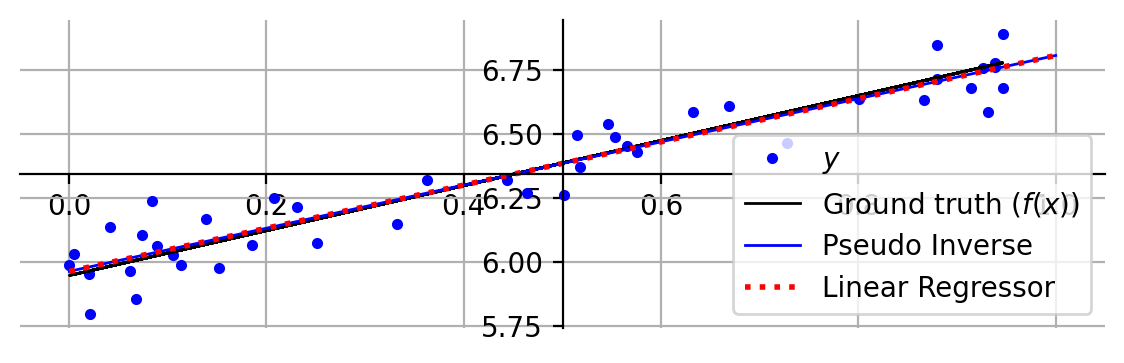

In [12]:
fig = plt.figure(figsize=(7,2))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.plot(x[:, 1], y, 'b.', label='$y$')
ax.plot(x[:, 1], y_gt, '-k', label='Ground truth ($f(x)$)', linewidth=1)
ax.plot(u, v, '-b', label='Pseudo Inverse', linewidth=1)
ax.plot(u, y_reg, ':r', label='Linear Regressor', linewidth=2)
plt.grid()
plt.legend()
plt.show()